In [1]:
from utils.plotting_style import *
import matplotlib.pyplot as plt
import numpy as np

cifar = {
    "AdaDiff": np.array([
        (17.89, 1.93),
        (17.55, 1.63),
        (24.60, 1.32)
    ]),
    "DuoDiff": np.array([
        (17.89, 1.88),
        (17.81, 1.45),
        (17.95, 1.30),
        (18.67, 1.16)
    ])
}

celeba = {
    "AdaDiff": np.array([
        (9.99, 1.92),
        (31.41, 1.36)
    ]),
    "DuoDiff": np.array([
        (9.98, 1.88),
        (10.08, 1.45),
        (10.61, 1.30),
        (12.18, 1.16),
    ])
}

imagenet64 = {
    "AdaDiff": np.array([
        (19.19, 5.25),
        (32.52, 3.90),
        (51.94, 3.24)
    ]),
    "DuoDiff": np.array([
        (19.19, 5.12),
        (21.49, 3.8),
        (25.31, 3.45),
        (31.26, 3.02)
    ])
}

imagenet256 = {
    "AdaDiff": np.array([
        (28.86, 8.66),
        (44.65, 7.67),
        (57.64, 7.13)
    ]),
    "DuoDiff": np.array([
        (25.38, 10.94),
        (27.86, 8.14),
        (32.34, 7.21),
        (43.43, 6.27)
    ])
}

datasets = (imagenet64, imagenet256)
dataset_names = ("ImageNet 64x64", "ImageNet 256x256")
methods = ("AdaDiff", "DuoDiff")

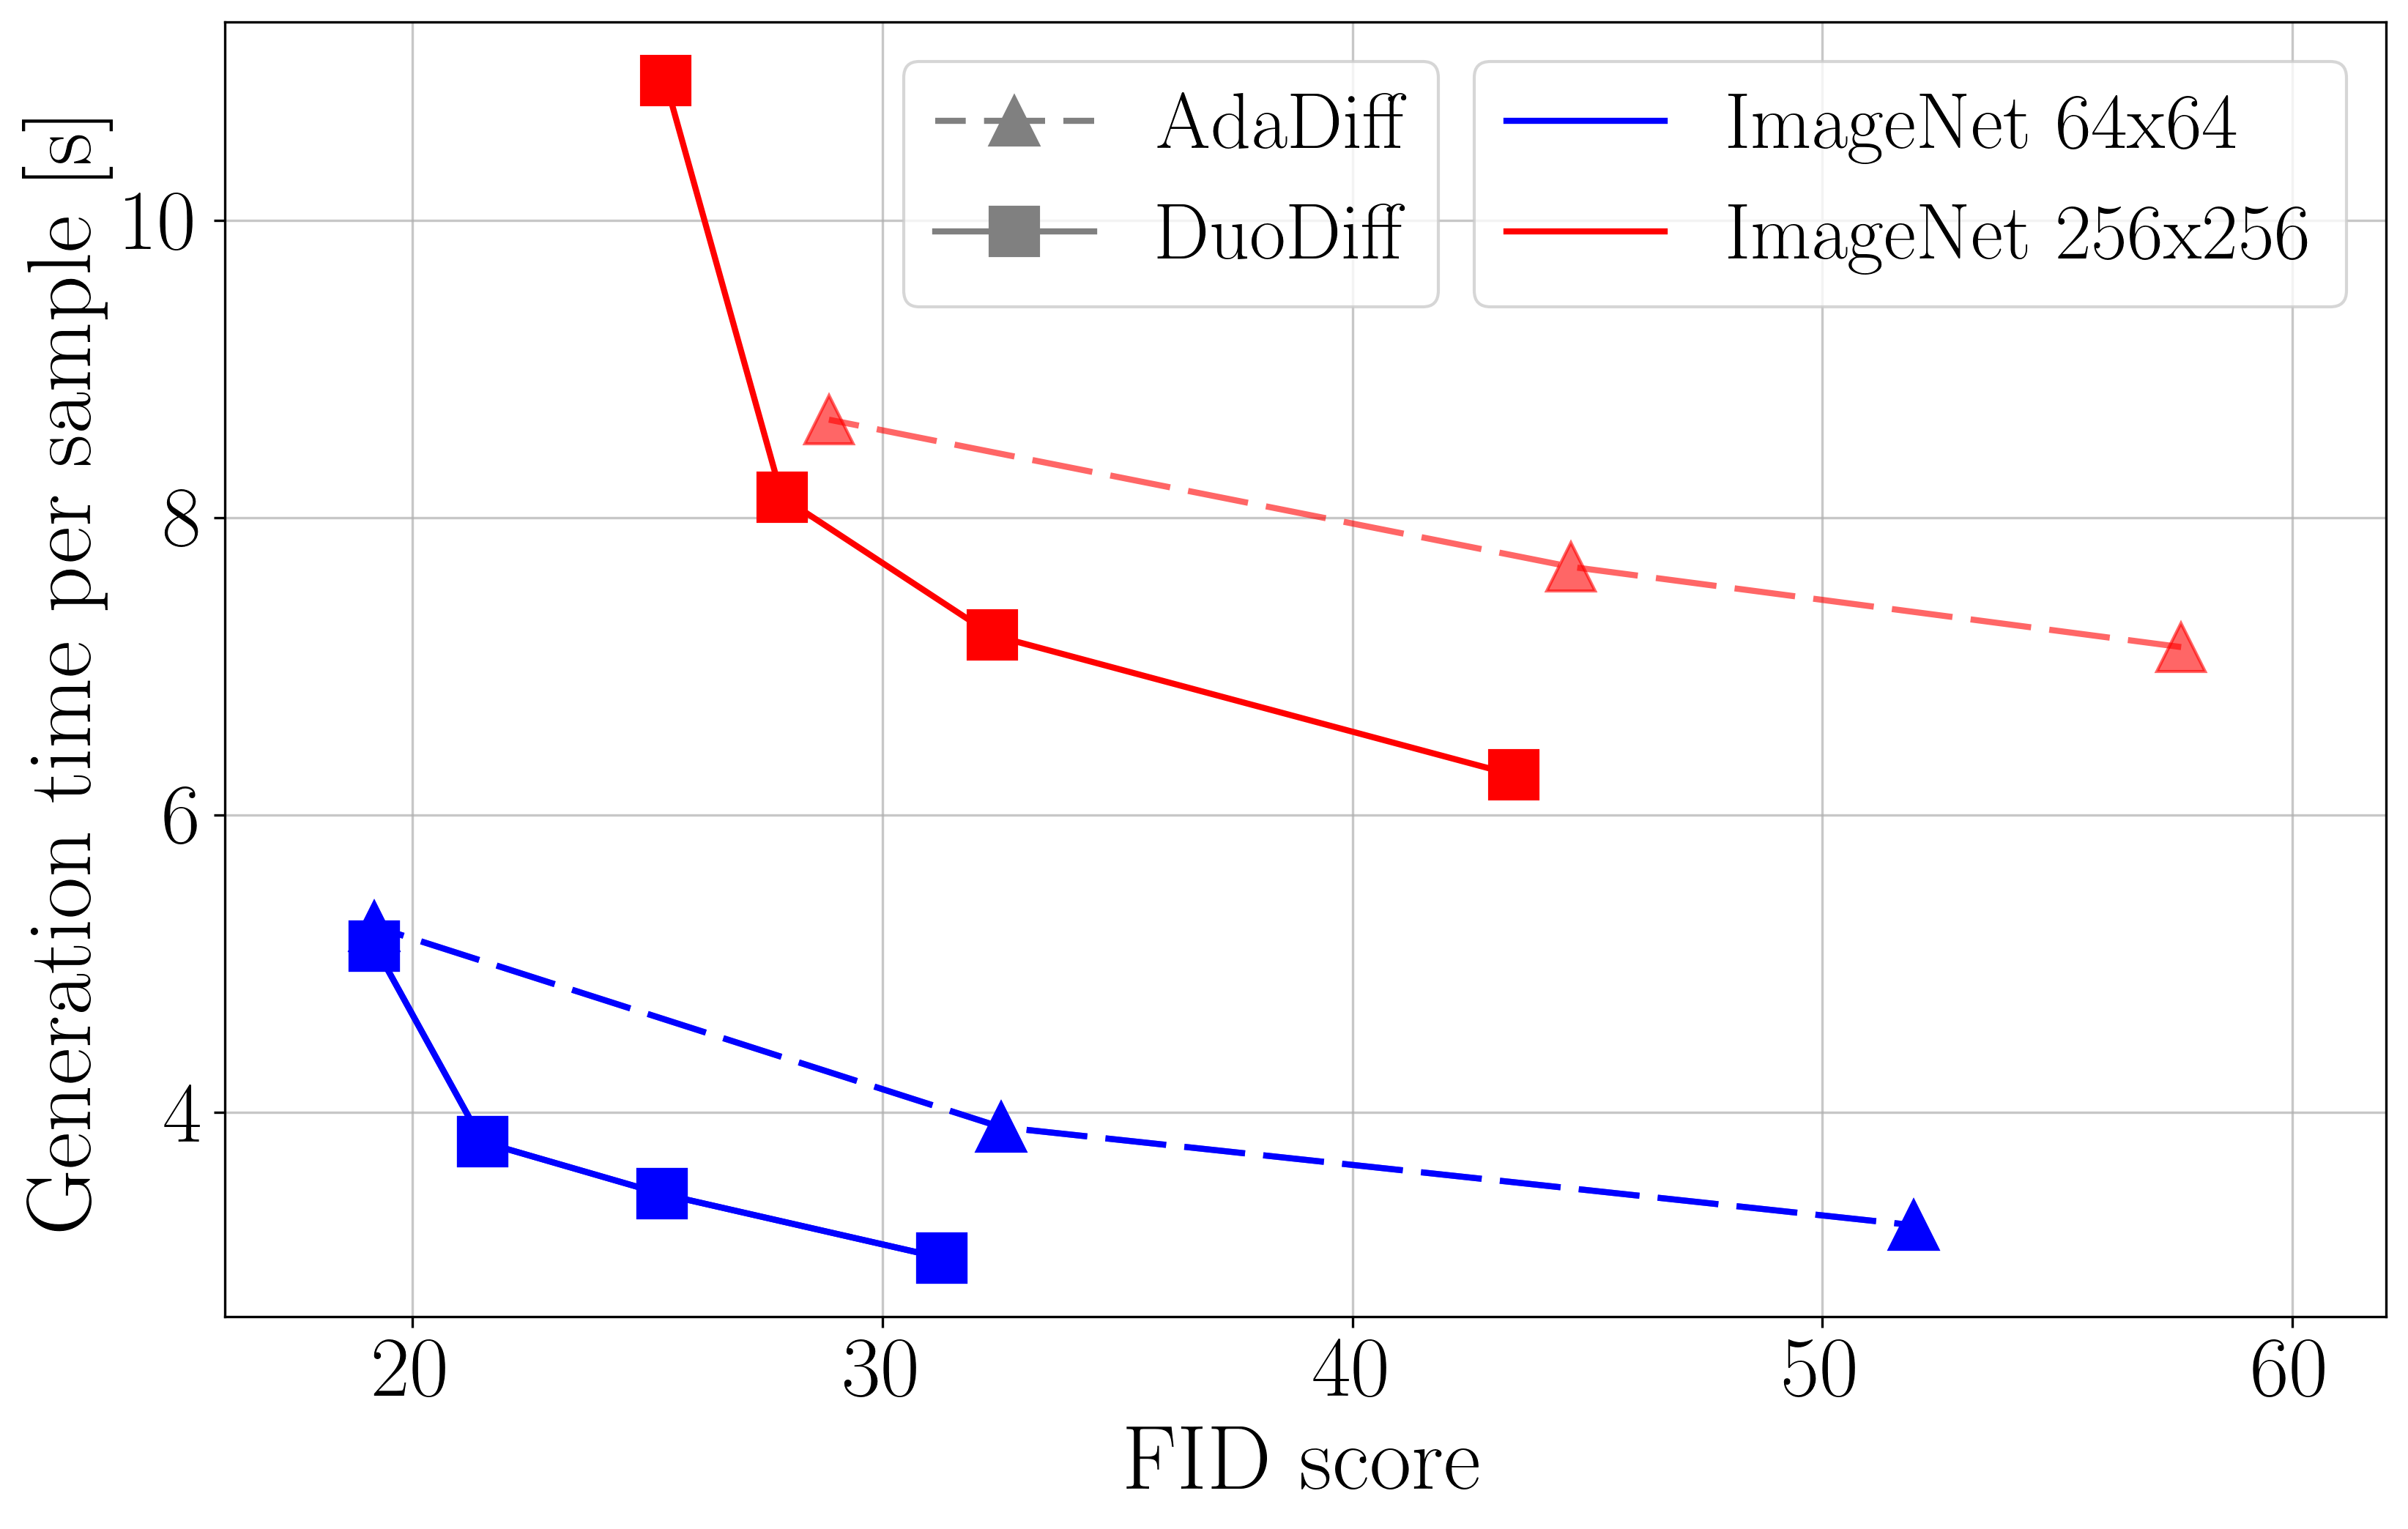

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11, 7))

colors = ['blue', 'red', '#2ca02c', '#d62728']
markers = ['^', 's', 'o', 'D']
linestyles = [(5, (10, 3)), "-"]

dataset_lines = []
model_lines = []

for i, dataset in enumerate(datasets):
    dataset_name = dataset_names[i]
    for j, method in enumerate(methods):
        x = dataset[method][:, 0]
        y = dataset[method][:, 1]

        # Plot with markers for dataset and methods
        line, = ax.plot(x, y, marker=markers[j], linestyle=linestyles[j], linewidth=2, markersize=16,
                        label=f"{dataset_name}", color=colors[i],
                        alpha=0.6 if j == 0 else 1)
        
        if j == 0:
            # Save dataset lines but without markers for the legend
            dataset_lines.append(ax.plot([], [], linestyle="-", linewidth=2, color=colors[i])[0])
        if i == 0:
            # Save model lines with their original color for the plot but grey for the legend
            line_model, = ax.plot(x, y, marker=markers[j], linestyle=linestyles[j], linewidth=2, markersize=16,
                                  label=f"{method}", color=colors[i])  # Keep original color for plot
            # Create a grey version for the legend
            model_lines.append(ax.plot([], [], linestyle=linestyles[j], linewidth=2, markersize=16, 
                                       marker=markers[j], color='grey')[0])  # Grey for the legend

# Set labels and grid
ax.set_ylabel("Generation time per sample [s]", fontsize=30)
ax.set_xlabel("FID score", fontsize=30)
ax.set_xlim([16, 62])
ax.grid(True, linestyle='-', alpha=0.7)

# First legend for datasets (lines only, no markers)
legend1 = ax.legend(dataset_lines, dataset_names, loc="upper right", fontsize=26, title_fontsize=24, bbox_to_anchor=(1, 1))

# Second legend for models (grey lines with markers)
legend2 = ax.legend(model_lines, methods, loc="upper right", fontsize=26, title_fontsize=24, bbox_to_anchor=(0.58, 1))

# Add the first legend back after the second
ax.add_artist(legend1)

# Adjust tick parameters
ax.tick_params(axis='both', which='major', labelsize=28)
ax.tick_params(axis='both', which='minor', labelsize=28)

# Final adjustments to layout and save the figure
plt.tight_layout()
plt.savefig("../img/imagenet_fid_time.pdf")


In [3]:
print(model_lines[0])

Line2D(_child3)
